In [41]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import math 

directory = "./"

times = []


for root, dirs, files in os.walk(directory):
    for file in files:
        try:
            if file.endswith(".csv"):
                # print(file)
                f = open(file, 'r')
                times.append(f.readline())
                f.close()
        except:
            continue

order = []
size = []
algorithm = []
time = []
for lines in times:
    matches = re.findall(
        r'Order: (\w+)\sSize:(\d+)\sAlgo:(\w+)\s+Time\s+\(ms\):\s(\d+)', lines)
    for match in matches:
        order.append(match[0])
        size .append(int(match[1]))
        algorithm.append(match[2])
        time.append(match[3])

df = pd.DataFrame({"Order": order, "Size": size,
                   "Algorithm": algorithm, "Time (ms)": time})

display(df)

df['Log Size (log (n))'] = df['Size'].apply(lambda x: round(math.log(int(x)), 2))

display(df)

,Order,Size,Algorithm,Time (ms)
0,ascending,1000000,insertion,47647024
1,random,1000,insertion,5324763
2,descending,100,bubble,352752
3,ascending,100000,quick,95696758
4,descending,1000,merge,1133709
...,...,...,...,...
67,ascending,10000,bubble,33811792
68,descending,100000,insertion,3790573217
69,random,10,insertion,6293
70,random,10,bubble,5678


,Order,Size,Algorithm,Time (ms),Log Size (log (n))
0,ascending,1000000,insertion,47647024,13.82
1,random,1000,insertion,5324763,6.91
2,descending,100,bubble,352752,4.61
3,ascending,100000,quick,95696758,11.51
4,descending,1000,merge,1133709,6.91
...,...,...,...,...,...
67,ascending,10000,bubble,33811792,9.21
68,descending,100000,insertion,3790573217,11.51
69,random,10,insertion,6293,2.30
70,random,10,bubble,5678,2.30


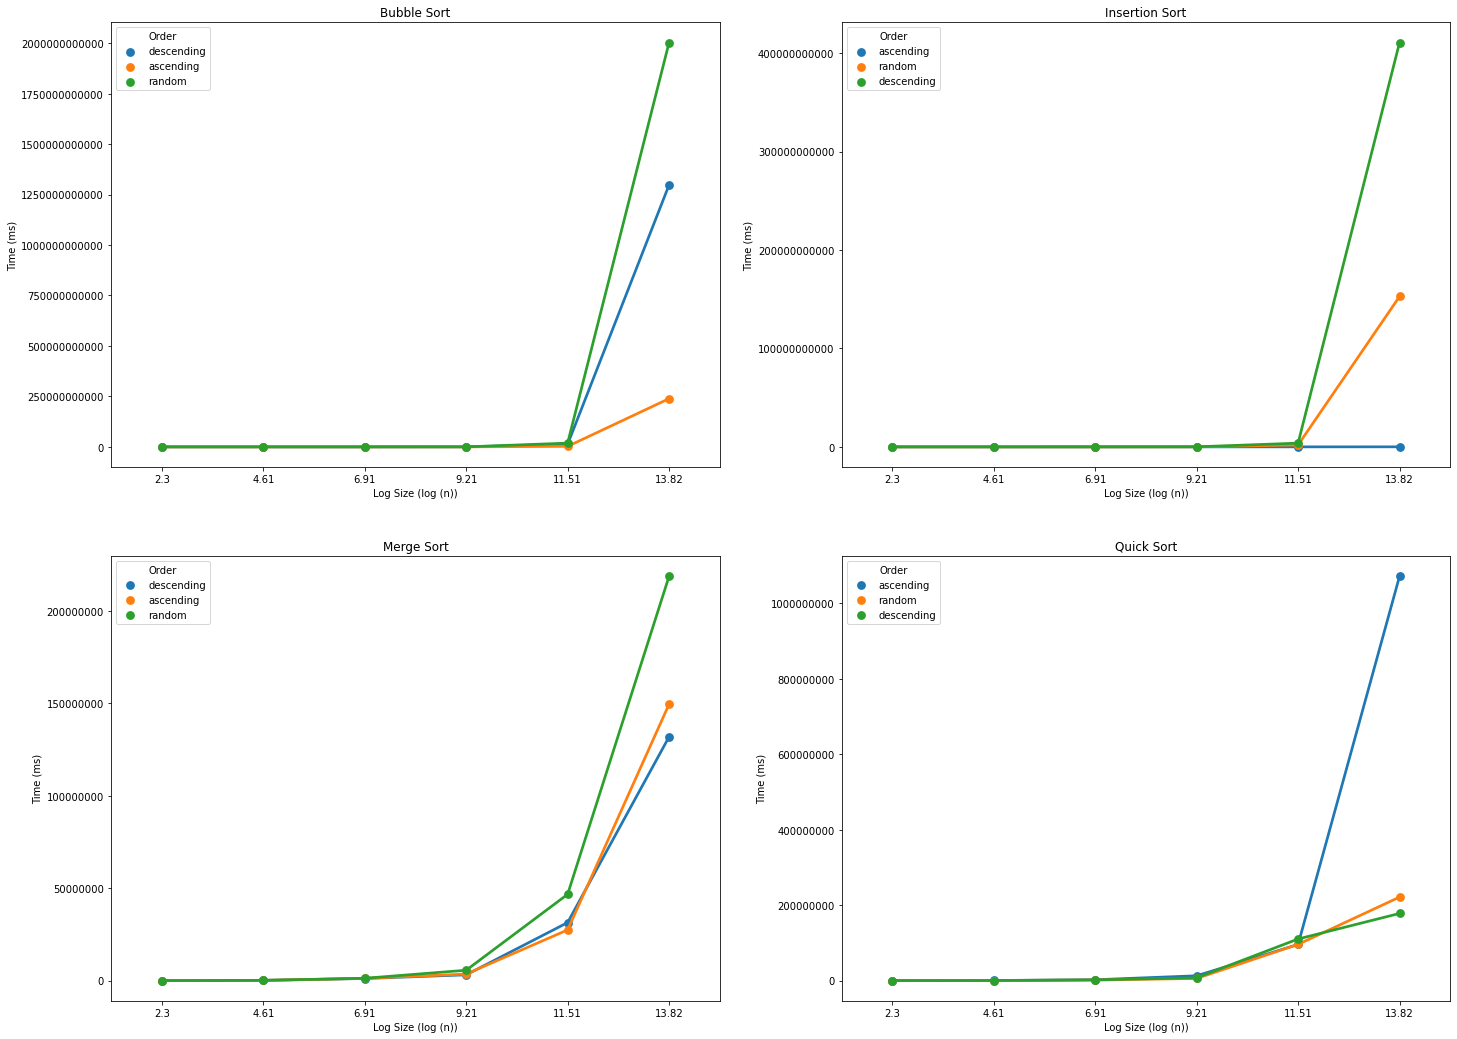

In [42]:
fig, ((bubble_ax, insertion_ax), (merge_ax,quick_ax)) = plt.subplots(nrows=2, ncols=2, figsize= (24, 18))

merge_filt = df['Algorithm'] == "merge"
insertion_filt = df['Algorithm'] == "insertion"
bubble_filt = df['Algorithm'] == "bubble"
quick_filt = df['Algorithm'] == "quick"

# display(df[merge_filt])
# display(df.dtypes)


sns.pointplot(x='Log Size (log (n))', y = 'Time (ms)', hue = 'Order', data = df[bubble_filt], ax = bubble_ax)
sns.pointplot(x='Log Size (log (n))', y = 'Time (ms)', hue = 'Order', data = df[insertion_filt], ax = insertion_ax)
sns.pointplot(x='Log Size (log (n))', y = 'Time (ms)', hue = 'Order', data = df[merge_filt], ax = merge_ax)
sns.pointplot(x='Log Size (log (n))', y = 'Time (ms)', hue = 'Order', data = df[quick_filt], ax = quick_ax)

bubble_ax.ticklabel_format(style = "plain", axis ="y")
bubble_ax.set_title('Bubble Sort')
bubble_ax
insertion_ax.ticklabel_format(style = "plain", axis ="y")
insertion_ax.set_title("Insertion Sort")
quick_ax.ticklabel_format(style = "plain", axis ="y")
quick_ax.set_title("Quick Sort")
merge_ax.ticklabel_format(style = "plain", axis ="y")
merge_ax.set_title("Merge Sort")



fig.suptitle = "Sorting Algorithm Analysis"
fig.show()
fig.savefig("./algo_plot.png")

